In [1]:
import kwant
import numpy as np
import matplotlib.pyplot as plt
import tinyarray
%matplotlib inline

C:\Users\caidi\Anaconda3\lib\site-packages\kwant\solvers\default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


In [2]:
sigma_0 = tinyarray.array([[1, 0], [0, 1]])
sigma_x = tinyarray.array([[0, 1], [1, 0]])
sigma_y = tinyarray.array([[0, -1j], [1j, 0]])
sigma_z = tinyarray.array([[1, 0], [0, -1]])

def make_system(a=1,t = 1.0, W = 10, L = 30, L_well = 10):
    lat = kwant.lattice.square(a)
    
    syst = kwant.Builder()
    
    
    def potential(site,pot):
        (x,y) = site.pos
        if (L-L_well)/2 < x < (L+L_well)/2:
            return pot
        else:
            return 0
    def onsite(site,pot):
        return 4*t + potential(site,pot)
    
    syst[(lat(x,y) for x in range(L) for y in range(W))] = onsite
    syst[lat.neighbors()] = -t
    
    lead = kwant.Builder(kwant.TranslationalSymmetry((-a,0)))
    lead[(lat(0,y) for y in range(W))] = 4*t
    lead[lat.neighbors()] = -t
    syst.attach_lead(lead)
    syst.attach_lead(lead.reversed())
    return syst

In [3]:
syst = make_system()

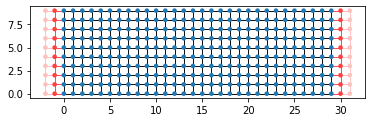

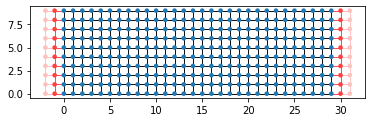

In [4]:
kwant.plot(syst)

In [5]:
syst = syst.finalized()

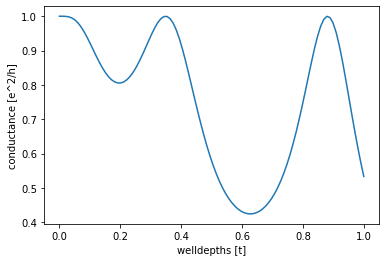

In [6]:
data = []
welldepths = np.linspace(0,1,100)
energy = 0.2
for welldepth in welldepths:
    smatrix = kwant.smatrix(syst,energy,params = dict(pot = -welldepth))
    data.append(smatrix.transmission(1,0))
plt.figure()
plt.plot(welldepths,data)
plt.xlabel("welldepths [t]")
plt.ylabel("conductance [e^2/h]")
plt.show()